<a href="https://colab.research.google.com/github/NahataiTep/DPDM65/blob/main/pandas101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import = การเรียกใช้ packgage

as = ตั้งชื่อ packgage นั้นเพื่อเรียกใช้ (ไม่มีก็ได้)

pandas = package ที่มีคนพัฒนาขึ้นมาเพื่อใช้จัดการข้อมูลที่มีลักษณะเป็นตาราง ซึ่งใน pandas เรียกว่า dataframe

In [1]:
import pandas as pd
import numpy as np

Meta Data = Data that  describbes data

CSV = Comma Separated Values

ในการส่งข้อมูลให้คนอื่น ควรจะมี meta data เพื่ออธิบายว่าแต่ละคอลัมน์ของข้อมูลคืออะไร

# Data loading

## วิธีที่ 1 ใช้ user space ของ colab

วิธี : กดรูปโฟลเดอร์ด้านซ้ายมือ + อันแรก เพื่ออัปโหลดไฟล์จากเครื่อง 

ข้อดี : อัปโหลดได้เร็ว ดึงไฟล์จากเครื่องได้เลย

ข้อเสีย : เมื่อปิด colab และเปิดใหม่ ไฟล์ตรงนี้จะหายไป เหมาะกับการใช้งานครั้งเดียว เพราะถ้าเปิดใหม่ ต้องอัปโหลดใหม่เสมอ!!

ในการใช้งาน กด : ด้านขวา และคัดลอกเส้นทาง

In [2]:
property_df = pd.read_csv('/content/opendata_unittype.csv') 

FileNotFoundError: ignored

In [ ]:
property_df.head()    # โชว์หัวตาราง ~ 5 แถวแรก

## วิธีที่ 2 ใช้ mount to google drive

วิธี : เรียกใช้คำสั่ง (ด้านล่าง) เพื่อเชื่อม drive -> ไฟล์ที่ต้องการต้องเซฟเข้าไปในไดรฟ์ไว้ เพื่อรอเรียกใช้งาน

ข้อดี : สามารถเรียกได้ตลอด ปิดเปิดไฟล์ใหม่ รันใหม่ได้เสมอ

ข้อเสีย : ต้องอัปโหลดไฟล์เก็บไว้ในไดรฟ์ก่อน

ในการใช้งาน กดหาไฟล์ที่ต้องการ แล้วกด : ด้านขวา และคัดลอกเส้นทาง

In [3]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
project_df = pd.read_csv('/content/drive/MyDrive/DPDM2022/Copy of opendata_project.csv')

In [5]:
# ใช้ dtype เพื่อเปลี่ยนชนิดข้อมูล
project_df = pd.read_csv('/content/drive/MyDrive/DPDM2022/Copy of opendata_project.csv', dtype={'price_min':np.float64})

ValueError: ignored

อยากเปลี่ยน price_min ให้เป็นตัวเลข แต่ error เพราะมีคนใส่ข้อมูลผิด (สามโคกไม่สามารถเปลี่ยนเป็นเลขได้)

ต้องมีการตัดการค่าในตารางก่อน

## คำสั่ง

### Eye balling **data**

In [6]:
project_df.shape      #ขนาดข้อมูล  #ไม่มีวงเล็บ = ไม่ใช่ฟังก์ชัน

(23434, 45)

In [7]:
project_df.head()     #ดูหัวตาราง  #เป็นฟังก์ชัน (ลองกดดูโดยเอาเม้าส์ชี้ที่ตรงกลางวงเล็บได้ ว่าฟังก์ชันเป็นอย่างไร)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...


In [8]:
project_df.head(10) 

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...
5,9434.0,project_15884,H2 Wood,เอชทู วูด,2,Condo,คอนโด,1480000.0,developer_1789,"Asset Wise Pub Co., Ltd.",...,0.0,0.0,0.0,1.0,1.0,2019-06-28 13:47:37,2015-12-31 07:00:00,2020-12-04 10:43:13,baania,https://baania.com/th/project/เอชทู-วูด-projec...
6,9219.0,5e86f32e5f777e0012d06c04,Setthasiri Lampang 2,เศรษฐศิริ ลำปาง 2,3,Townhome,ทาวน์โฮม,990000.0,5e8703595f777e0012d06c6d,"Sedsiri Property 2499 Co., Ltd.",...,NaN,NaN,NaN,NaN,1.0,2020-04-03 15:26:22,NaN,2021-01-06 17:00:07,baania,https://baania.com/th/project/เศรษฐศิริ-ลำปาง-...
7,9022.0,project_1488,Homeland 3 Paradise Garden,โฮมแลนด์ 3 พาราไดซ์ การ์เด้น,1,Detached House,บ้าน,2600000.0,developer_1336,NaN,...,NaN,1.0,1.0,1.0,1.0,2016-06-10 14:52:22,2022-01-01 07:00:00,2022-02-28 18:30:07,baania,https://baania.com/th/project/โฮมแลนด์-3-พาราไ...
8,7266.0,project_6637,Lumpini Place Rama 4-Sathorn,ลุมพินีเพลสพระราม 4-สาทร,2,Condo,คอนโด,1990000.0,developer_1745,"L.P.N.Development PCL Co., Ltd.",...,NaN,NaN,1.0,1.0,1.0,2017-05-04 13:45:47,2003-12-31 07:00:00,2020-12-04 10:40:46,baania,https://baania.com/th/project/ลุมพินีเพลสพระรา...
9,3878.0,61f23ca025ee250014de37f7,Baan Koonpachai,บ้านขุนพิชัย,1,Detached House,บ้าน,2390000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-01-27 13:33:04,2021-01-01 07:00:00,2022-01-27 14:00:08,baania,https://baania.com/th/project/บ้านขุนพิชัย-61f...


In [9]:
project_df.tail()     # ดูท้ายตาราง

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
23429,12883.0,project_12317,Baan Klangmeung Urbanion Ladphrao-Chokchai 4,บ้านกลางเมือง เออร์บาเนี่ยน ลาดพร้าว-โชคชัย 4,3,Townhome,ทาวน์โฮม,5700000.0,developer_1760,"AP (Thailand) Co,. Ltd",...,NaN,1.0,1.0,NaN,1.0,2017-12-06 13:10:23,1970-01-02 07:00:00,2020-12-04 10:42:15,baania,https://baania.com/th/project/บ้านกลางเมือง-เอ...
23430,21181.0,project_12057,@Home Kaset-Nawamin,แอทโฮม เกษตร-นวมินทร์,3,Townhome,ทาวน์โฮม,3590000.0,developer_1793,"Areeya Property Co.,Ltd.",...,NaN,NaN,NaN,NaN,1.0,2017-11-30 11:12:12,1970-01-02 07:00:00,2022-06-06 16:30:06,baania,https://baania.com/th/project/แอทโฮม-เกษตร-นวม...
23431,13993.0,project_4461,I-Design Wongwaen-Ramintra,ไอ-ดีไซน์ วงแหวน-รามอินทรา,4,Commercial,อาคารพาณิชย์,1870000.0,developer_2217,"Wangthong Group Pub Co., Ltd.",...,NaN,1.0,1.0,NaN,1.0,2017-03-02 11:07:30,2014-12-31 07:00:00,2020-12-04 10:42:33,baania,https://baania.com/th/project/ไอ-ดีไซน์-วงแหวน...
23432,5889.0,project_144,Koolpunt Ville 15 Park Avenue,กุลพันธ์วิลล์ 15 พาร์ค อเวนิว,1,Detached House,บ้าน,4000000.0,developer_1004,"Homeland Service Co., Ltd.",...,NaN,1.0,1.0,1.0,1.0,2015-09-28 09:00:28,2020-01-01 07:00:00,2022-01-10 15:00:13,baania,https://baania.com/th/project/กุลพันธ์วิลล์-15...
23433,5529.0,project_16300,Thawisuk Garden Home,ทวีสุข การ์เด้นโฮม,1,Detached House,บ้าน,2800000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2019-07-05 17:10:33,1970-01-02 07:00:00,2020-12-04 10:45:22,baania,https://baania.com/th/project/ทวีสุข-การ์เด้นโ...


In [10]:
project_df.dtypes     # ดูประเภทของข้อมูลในตาราง

row_number                float64
project_id                 object
name_en                    object
name_th                    object
propertytype_id            object
propertytype_name_en       object
propertytype_name_th       object
price_min                  object
developer_id               object
developer_name_en          object
developer_name_th          object
latitude                  float64
longitude                 float64
neighborhood_id            object
neighborhood_name_en       object
neighborhood_name_th       object
subdistrict_id            float64
subdistrict_name_en        object
subdistrict_name_th        object
district_id               float64
district_name_en           object
district_name_th           object
province_id               float64
province_name_en           object
province_name_th           object
zipcode                   float64
count_elevator             object
count_elevator_service     object
count_floor                object
count_parking 

##### NaN 
= Not a Number =  missing data

##### null
= missing data

### Statistical Description

In [11]:
project_df.describe()

,row_number,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,23429.000000,23434.000000,23429.000000,23415.000000,23424.000000,23425.000000,23403.000000,21547.000000,18603.000000,6820.000000,8895.000000,2890.000000,11675.000000,6277.000000,9718.000000,16123.000000
mean,11715.000000,16.399159,100.600086,4216.201751,4001.917435,3942.592231,28209.221211,199.043765,2.325861,0.724340,0.848679,0.224913,0.894304,0.697308,0.874048,0.959809
std,6763.514064,176.896370,0.947247,2476.968321,1662.485878,1663.662562,24724.177495,320.029641,2.138378,0.446879,0.358382,0.417598,0.307461,0.459460,0.331812,0.196413
min,1.000000,6.839354,97.985808,1007.000000,1006.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5858.000000,13.347151,100.400282,3414.000000,3411.000000,3372.000000,10400.000000,49.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,11715.000000,13.753725,100.601281,3802.000000,3800.000000,3781.000000,20000.000000,108.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17572.000000,13.946742,100.912703,4527.000000,4000.000000,3781.000000,40000.000000,240.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,23429.000000,12160.000000,105.222114,20688.000000,20003.000000,10508.000000,390000.000000,10074.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


จะหาข้อมูล
* ดู meta data หามีคอลัมน์ที่ต้องการ
* เช็กใน describe

### การจัดการค่าในตารางเบื้องต้น

1. หา row ที่มีปัญหา

In [12]:
project_df[project_df['price_min']=='สามโคก']   # เลือกแถวที่ price_min เป็นสามโคก

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
5839,NaN,ขนส่งปทุม,3656.0,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8866,NaN,ขนส่งปทุม,3656.0,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23353,NaN,ขนส่งปทุม,3656.0,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. ลบ row ที่ไม่ต้องการออก

In [13]:
project_df2 = project_df[project_df['price_min']!='สามโคก']     # เก็บค่าในตัวแปรอื่น

3. แปลง dtype เป็น float

In [14]:
project_df2.astype({'price_min':np.float64})

ValueError: ignored

จะเห็บว่า มีข้อมูลที่ผิดอีก --> ย้อนกลับไปทำ step 1-3 ใหม่ จนกว่าจะได้

In [15]:
project_df3 = project_df2[project_df2['price_min']!='เมืองปทุมธานี'] 
project_df3.astype({'price_min':np.float64})

ValueError: ignored

In [16]:
project_df4 = project_df3[project_df3['price_min']!='ลาดหลุมแก้ว'] 
project_df4.astype({'price_min':np.float64})

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23429,12883.0,project_12317,Baan Klangmeung Urbanion Ladphrao-Chokchai 4,บ้านกลางเมือง เออร์บาเนี่ยน ลาดพร้าว-โชคชัย 4,3,Townhome,ทาวน์โฮม,5700000.0,developer_1760,"AP (Thailand) Co,. Ltd",...,NaN,1.0,1.0,NaN,1.0,2017-12-06 13:10:23,1970-01-02 07:00:00,2020-12-04 10:42:15,baania,https://baania.com/th/project/บ้านกลางเมือง-เอ...
23430,21181.0,project_12057,@Home Kaset-Nawamin,แอทโฮม เกษตร-นวมินทร์,3,Townhome,ทาวน์โฮม,3590000.0,developer_1793,"Areeya Property Co.,Ltd.",...,NaN,NaN,NaN,NaN,1.0,2017-11-30 11:12:12,1970-01-02 07:00:00,2022-06-06 16:30:06,baania,https://baania.com/th/project/แอทโฮม-เกษตร-นวม...
23431,13993.0,project_4461,I-Design Wongwaen-Ramintra,ไอ-ดีไซน์ วงแหวน-รามอินทรา,4,Commercial,อาคารพาณิชย์,1870000.0,developer_2217,"Wangthong Group Pub Co., Ltd.",...,NaN,1.0,1.0,NaN,1.0,2017-03-02 11:07:30,2014-12-31 07:00:00,2020-12-04 10:42:33,baania,https://baania.com/th/project/ไอ-ดีไซน์-วงแหวน...
23432,5889.0,project_144,Koolpunt Ville 15 Park Avenue,กุลพันธ์วิลล์ 15 พาร์ค อเวนิว,1,Detached House,บ้าน,4000000.0,developer_1004,"Homeland Service Co., Ltd.",...,NaN,1.0,1.0,1.0,1.0,2015-09-28 09:00:28,2020-01-01 07:00:00,2022-01-10 15:00:13,baania,https://baania.com/th/project/กุลพันธ์วิลล์-15...


In [17]:
project_df4.describe()

,row_number,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,23429.000000,23429.000000,23429.000000,23415.000000,23424.000000,23424.000000,23402.000000,21547.000000,18603.000000,6820.000000,8895.000000,2890.000000,11675.000000,6277.000000,9718.000000,16123.000000
mean,11715.000000,13.815267,100.600086,4216.201751,4001.917435,3942.760502,28210.426587,199.043765,2.325861,0.724340,0.848679,0.224913,0.894304,0.697308,0.874048,0.959809
std,6763.514064,2.329519,0.947247,2476.968321,1662.485878,1663.498714,24724.018090,320.029641,2.138378,0.446879,0.358382,0.417598,0.307461,0.459460,0.331812,0.196413
min,1.000000,6.839354,97.985808,1007.000000,1006.000000,1005.000000,10002.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5858.000000,13.347079,100.400282,3414.000000,3411.000000,3372.000000,10400.000000,49.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,11715.000000,13.753692,100.601281,3802.000000,3800.000000,3781.000000,20000.000000,108.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17572.000000,13.946525,100.912703,4527.000000,4000.000000,3781.000000,40000.000000,240.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,23429.000000,20.442105,105.222114,20688.000000,20003.000000,10508.000000,390000.000000,10074.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


จากด้านบนเป็นการลบตัวที่มีปัญหาไปเรื่อยๆ จึงมีคำสั่งใหม่เพื่อให้ใช้งานได้ง่ายชึ้น

In [18]:
project_df['price_min'] = pd.to_numeric(project_df['price_min'],errors='coerce')

In [19]:
project_df.describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,23429.000000,2.331200e+04,23434.000000,23429.000000,23415.000000,23424.000000,23425.000000,23403.000000,21547.000000,18603.000000,6820.000000,8895.000000,2890.000000,11675.000000,6277.000000,9718.000000,16123.000000
mean,11715.000000,3.750454e+06,16.399159,100.600086,4216.201751,4001.917435,3942.592231,28209.221211,199.043765,2.325861,0.724340,0.848679,0.224913,0.894304,0.697308,0.874048,0.959809
std,6763.514064,6.907696e+06,176.896370,0.947247,2476.968321,1662.485878,1663.662562,24724.177495,320.029641,2.138378,0.446879,0.358382,0.417598,0.307461,0.459460,0.331812,0.196413
min,1.000000,0.000000e+00,6.839354,97.985808,1007.000000,1006.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5858.000000,1.560000e+06,13.347151,100.400282,3414.000000,3411.000000,3372.000000,10400.000000,49.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,11715.000000,2.390000e+06,13.753725,100.601281,3802.000000,3800.000000,3781.000000,20000.000000,108.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17572.000000,3.800000e+06,13.946742,100.912703,4527.000000,4000.000000,3781.000000,40000.000000,240.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,23429.000000,2.850000e+08,12160.000000,105.222114,20688.000000,20003.000000,10508.000000,390000.000000,10074.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Q: ราคาบ้านที่แพงที่สุดเท่ากับเท่าไหร่

A:  2.85 * 10^8 - ดูผ่าน max(price_min)

Q: ประเทศไทย อยู่ที่ ละติจูด ลองจิจูด เท่าไร

A: (16.39915, 100.600086)    - ดูผ่าน ค่า mean(latitude, longitude) เพราะโครงการอยู่ในประเทศไทย

   - ดูผ่าน min/ max ก็ได้ แต่สำหรับข้อมูลนี้ max latitude น่าจะผิด

Q: zipcode มีปัญหาหรือไม่

A: น่าจะผิด เพราะ min/ max เป็นเลข 1 และหลักแสน แต่รหัสไปรษณีย์ควรมี 5 ตัว

Q: feature ของบ้าน อันไหนที่หมู่บ้านส่วนใหญ่ไม่มี

A: facility_meeting - ดูผ่านคอลัมน์ facility และแถว count

### Boxplot เพื่อหาค่าผิดปกติ

* เรียง data จากน้อยไปมาก
* plot แสดงค่า  Q1, median (=Q2), Q3, interquartile range (IQR=Q3-Q1), min (=Q1-1.5\*IQR), max (=Q3+1.5\*IQR)

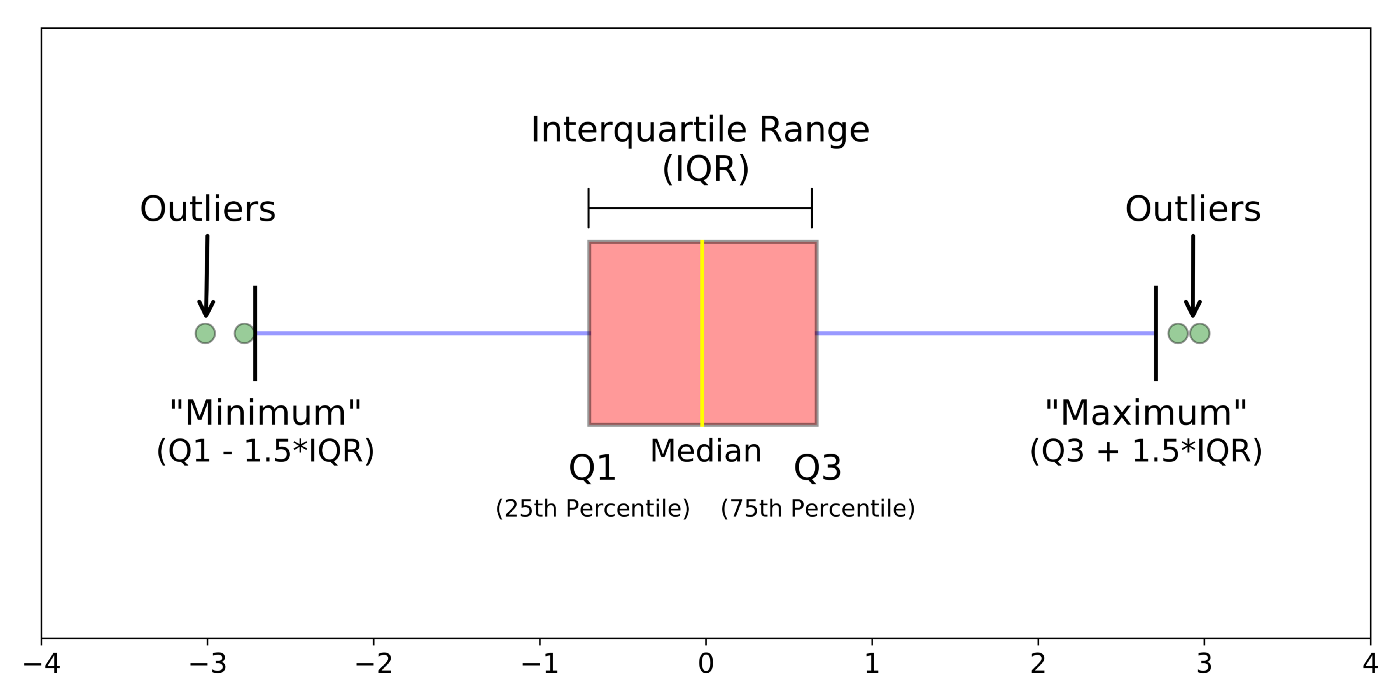

In [20]:
from matplotlib import pyplot as plt ##packgage วาดกราฟ

{'whiskers': [<matplotlib.lines.Line2D at 0x7f489d67ed10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f489d6097d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f489d67e710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f489d6112d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f489d611810>],
 'means': []}

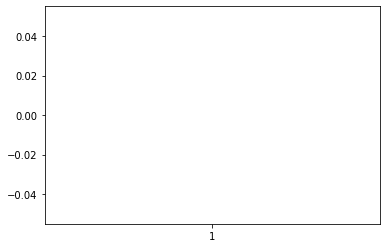

In [21]:
plt.boxplot(project_df['zipcode'])    # plot ไม่ได้ เพราะข้อมูลมี NaN

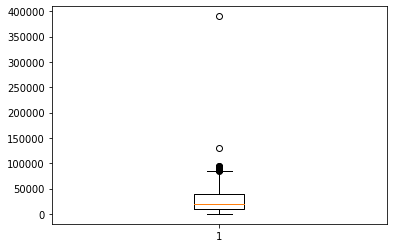

In [22]:
bp = plt.boxplot(project_df['zipcode'].dropna())    # ตัดค่า NaN ออกไปด้วย dropna

In [23]:
bp['boxes'][0].get_ydata()

array([10400., 10400., 40000., 40000., 10400.])

In [24]:
bp['fliers'][0].get_ydata()

array([ 90000.,  90000.,  92000.,  90000.,  90110.,  90110.,  90100.,
        90110.,  90110.,  90110.,  90110.,  90110.,  90000.,  90100.,
        90110.,  90110.,  90110.,  90110.,  90100.,  90110.,  90110.,
        92000.,  90110.,  90110.,  90110.,  90110.,  90110.,  90110.,
        90110.,  90110.,  90110.,  90110.,  90110.,  90110.,  90110.,
        90110.,  90110.,  90110.,  90110.,  90110.,  90110.,  90110.,
        90110.,  86000.,  90110.,  90110.,  90110.,  92000.,  90110.,
        90110.,  90110.,  90110.,  90110.,  90110.,  92000.,  90110.,
        90110.,  90100.,  90110.,  90110.,  90110.,  90110.,  90110.,
        92000.,  90110.,  90000.,  90110.,  92000.,  90110.,  90000.,
        90110.,  90110.,  90100.,  90110.,  90100.,  90110.,  90250.,
        90110.,  90110.,  90110.,  90110.,  90110.,  94000.,  90110.,
        90110.,  90110.,  90110.,  90100.,  90110.,  90100.,  90250.,
        90110.,  90000.,  90110.,  90110.,  90110.,  90100.,  90110.,
        90250.,  901

{'whiskers': [<matplotlib.lines.Line2D at 0x7f489d51aa10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f489d5214d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f489d51a4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f489d521f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f489d527510>],
 'means': []}

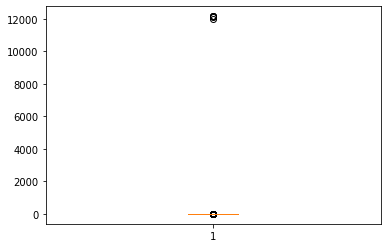

In [25]:
plt.boxplot(project_df['latitude'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f489cfcc1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f489cfccc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f489cfc5c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f489cfd5750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f489cfd5c90>],
 'means': []}

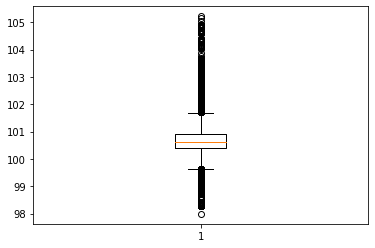

In [26]:
plt.boxplot(project_df['longitude'].dropna())

### Histogram
= กราฟแท่ง ที่แกน y (ความสูง) คือความถี่ แกน x คือประเภท

(array([1.3625e+04, 6.2290e+03, 1.5260e+03, 2.0020e+03, 1.0000e+01,
        2.1000e+01, 1.2000e+01, 4.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s

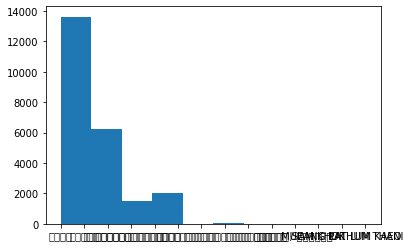

In [27]:
plt.hist(project_df['propertytype_name_th'].dropna())

(array([1.3625e+04, 6.2290e+03, 1.5260e+03, 2.0020e+03, 1.0000e+01,
        2.1000e+01, 1.2000e+01, 4.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

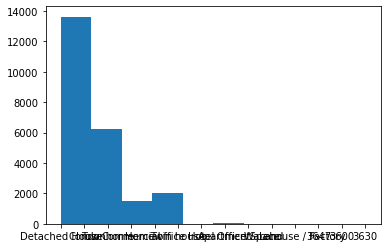

In [28]:
plt.hist(project_df['propertytype_name_en'].dropna())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

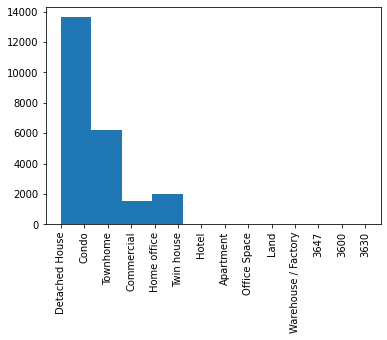

In [29]:
plt.hist(project_df['propertytype_name_en'].dropna())
plt.xticks(rotation='vertical')     # หมุนชื่อเป็นแนวตั้ง

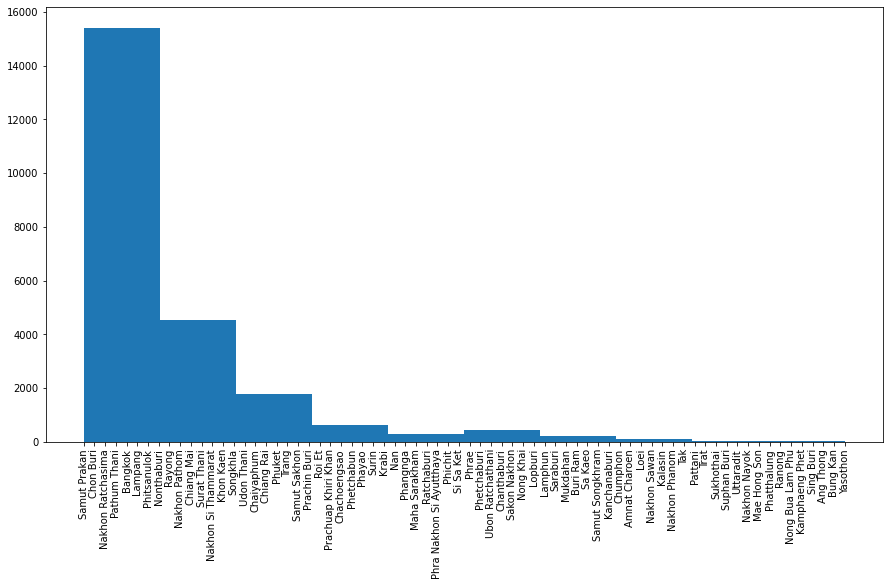

In [30]:
plt.figure(figsize=(15,8))      # จัดการขนาดรูป (x,y)
plt.hist(project_df['province_name_en'].dropna())
plt.xticks(rotation='vertical');    # ใส่ ; เพื่อปิดตัวเลข

***

In [31]:
property_df = pd.read_csv('/content/drive/MyDrive/DPDM2022/Copy of opendata_unittype.csv')

### Query (indexing)

#### Basic indexing

In [32]:
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...


In [33]:
project_df['propertytype_name_en']

0        Detached House
1                 Condo
2              Townhome
3        Detached House
4              Townhome
              ...      
23429          Townhome
23430          Townhome
23431        Commercial
23432    Detached House
23433    Detached House
Name: propertytype_name_en, Length: 23434, dtype: object

In [34]:
project_df['propertytype_name_en'][2]

'Townhome'

#### Slicing (iloc)
- ตัดตาราง

In [35]:
project_df.iloc[2,5]   #มองตารางเป็น array ตัดโดยพิจารณาแถว&คอลัมน์ (อย่าลืมอันแรกเริ่มต้นที่ 0)

'Townhome'

In [36]:
project_df.iloc[2:10,5:7]   #ดึงค่าหลายๆ แถว-คอลัมน์ได้โดยใช้ : (จาก begin ถึง end-1)

,propertytype_name_en,propertytype_name_th
2,Townhome,ทาวน์โฮม
3,Detached House,บ้าน
4,Townhome,ทาวน์โฮม
5,Condo,คอนโด
6,Townhome,ทาวน์โฮม
7,Detached House,บ้าน
8,Condo,คอนโด
9,Detached House,บ้าน


#### เลือกเฉพาะ data ที่ต้องการด้วย logical operation (query)

```
table[list_of_logic]
```

list_of_logic ต้องมีขนาดเท่ากับจำนวน data ในตาราง (จำนวนแถว)



In [37]:
project_df3 = project_df.head(10)

In [38]:
project_df3[[True, True, False, True, False, False, True, False, False, False]]   #ตัดมาแค่บางแถวที่ต้องการ (ที่ใส่ True)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
6,9219.0,5e86f32e5f777e0012d06c04,Setthasiri Lampang 2,เศรษฐศิริ ลำปาง 2,3,Townhome,ทาวน์โฮม,990000.0,5e8703595f777e0012d06c6d,"Sedsiri Property 2499 Co., Ltd.",...,NaN,NaN,NaN,NaN,1.0,2020-04-03 15:26:22,NaN,2021-01-06 17:00:07,baania,https://baania.com/th/project/เศรษฐศิริ-ลำปาง-...


In [39]:
project_df3[[True, True, False, True, False, False, True, False, False]]    #ถ้าใส่เลือกไม่ครบ/เกิน จะ error

ValueError: ignored

การสร้าง list of logics

In [40]:
project_df3['province_name_th']

0      สมุทรปราการ
1           ชลบุรี
2           ชลบุรี
3       นครราชสีมา
4         ปทุมธานี
5    กรุงเทพมหานคร
6            ลำปาง
7       นครราชสีมา
8    กรุงเทพมหานคร
9         พิษณุโลก
Name: province_name_th, dtype: object

In [41]:
project_df3['province_name_th']=='ขอนแก่น'     #หาว่ามีแถวไหนที่เป็นไปตามที่กำหนด

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: province_name_th, dtype: bool

In [42]:
project_df3['province_name_th']=='นครราชสีมา'

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9    False
Name: province_name_th, dtype: bool

In [43]:
project_df3[project_df3['province_name_th']=='นครราชสีมา']     #โชว์ผลทั้งแถว สำหรับแถวที่เป็นไปตามที่กำหนด

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
7,9022.0,project_1488,Homeland 3 Paradise Garden,โฮมแลนด์ 3 พาราไดซ์ การ์เด้น,1,Detached House,บ้าน,2600000.0,developer_1336,NaN,...,NaN,1.0,1.0,1.0,1.0,2016-06-10 14:52:22,2022-01-01 07:00:00,2022-02-28 18:30:07,baania,https://baania.com/th/project/โฮมแลนด์-3-พาราไ...


#### คำถามที่ซับซ้อนขึ้น
1. ราคาเฉลี่ยของโครงการบ้านที่ขอนแก่น
2. โครงการบ้านที่ขอนแก่นมีทั้งหมดกี่โครงการ

In [44]:
pkk = project_df[project_df['province_name_th']=='ขอนแก่น']
pkk

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
38,21234.0,project_2211,Baan Rungrueang Village Khon Kaen,บ้านรุ่งเรืองวิลเลจ ขอนแก่น,3,Townhome,ทาวน์โฮม,10000000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-10-05 10:23:58,1970-01-02 07:00:00,2020-12-04 10:47:35,baania,https://baania.com/th/project/บ้านรุ่งเรืองวิล...
72,9451.0,project_1947,Baan Thai Samut Khon Kaen,บ้านไทยสมุทร ขอนแก่น,1,Detached House,บ้าน,3500000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-08-30 15:37:25,1970-01-02 07:00:00,2020-12-04 10:45:28,baania,https://baania.com/th/project/บ้านไทยสมุทร-ขอน...
118,73.0,project_1914,Ohana Condo,โอฮาน่า คอนโด,2,Condo,คอนโด,1400000.0,developer_10510,NaN,...,NaN,NaN,NaN,1.0,1.0,2016-08-26 10:30:49,2015-12-31 07:00:00,2022-02-24 16:30:07,baania,https://baania.com/th/project/โอฮาน่า-คอนโด-pr...
123,14988.0,620cba8f0ffdb300136d2055,Chatpetch garden ville luxury,ฉัตรเพชร การ์เด้นวิลล์ ลักซ์ชัวรี่,1,Detached House,บ้าน,11890000.0,developer_1646,"KHAENGSAK LAND & HOUSE PART., LTD.",...,NaN,NaN,1.0,1.0,1.0,2022-02-16 15:49:19,NaN,2022-02-16 16:00:11,baania,https://baania.com/th/project/ฉัตรเพชร-การ์เด้...
162,2178.0,621c2500a441d30014e1f1f4,Varalee Village Airport-Bypass Khonkaen,บ้านวราลี แอร์พอร์ต-บายพาส ขอนแก่น,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-02-28 08:27:28,NaN,2022-02-28 10:30:06,baania,https://baania.com/th/project/บ้านวราลี-แอร์พอ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23250,13734.0,620f5ba80ffdb300136d20d9,B Villa Khonkaen,บี วิลล่า ขอนแก่น,1,Detached House,บ้าน,2890000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,1.0,2022-02-18 15:41:12,NaN,2022-03-17 16:40:12,baania,https://baania.com/th/project/บี-วิลล่า-ขอนแก่...
23286,11718.0,62203b58c1620300140bc3cd,The Home Assets Nongyai Phase 2,เดอะ โฮม แอสเซ็ท หนองใหญ่ เฟส 2,1,Detached House,บ้าน,2690000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-03-03 10:51:52,NaN,2022-03-03 12:30:05,baania,https://baania.com/th/project/เดอะ-โฮม-แอสเซ็ท...
23288,12639.0,5ea283d578b3120012dd4c96,Urbana Ville @Chum Phae,เออบาน่าวิลล์ @ชุมแพ,1,Detached House,บ้าน,1990000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,1.0,2020-04-24 13:14:45,NaN,2022-02-11 15:30:03,baania,https://baania.com/th/project/เออบาน่าวิลล์-ชุ...
23337,1502.0,project_1961,Baan Sapsin Phun Thawi,บ้านทรัพย์สินพูนทวี,1,Detached House,บ้าน,2490000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,1.0,2016-08-31 11:05:45,1970-01-02 07:00:00,2020-12-04 10:45:29,baania,https://baania.com/th/project/บ้านทรัพย์สินพูน...


In [45]:
len(pkk)    ## หาจำนวนแถวของตาราง

617

In [46]:
import numpy                      ## size of table
numpy.shape(pkk)

(617, 45)

In [47]:
sum(pkk['price_min'])/len(pkk)

2428410.045380875

ดังนั้น จำนวนโครงการในขอนแก่นมี 617 โครงการ และราคาเฉลี่ยเท่ากับ 2,428,410.04528 บาท

พิจารณาแค่โครงการ 'บ้าน' ใน 'ขอนแก่น' !!

In [48]:
project_df['province_name_th']=='ขอนแก่น'

0        False
1        False
2        False
3        False
4        False
         ...  
23429    False
23430    False
23431    False
23432    False
23433    False
Name: province_name_th, Length: 23434, dtype: bool

In [49]:
project_df['propertytype_name_th']=='บ้าน'

0         True
1        False
2        False
3         True
4        False
         ...  
23429    False
23430    False
23431    False
23432     True
23433     True
Name: propertytype_name_th, Length: 23434, dtype: bool

ใช้
- & (and) 
- | (or)

ในการรวมค่าความจริงที่เป็น list

In [50]:
(project_df['province_name_th']=='ขอนแก่น') & (project_df['propertytype_name_th']=='บ้าน')

0        False
1        False
2        False
3        False
4        False
         ...  
23429    False
23430    False
23431    False
23432    False
23433    False
Length: 23434, dtype: bool

In [51]:
project_df[(project_df['province_name_th']=='ขอนแก่น') & (project_df['propertytype_name_th']=='บ้าน')]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
72,9451.0,project_1947,Baan Thai Samut Khon Kaen,บ้านไทยสมุทร ขอนแก่น,1,Detached House,บ้าน,3500000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-08-30 15:37:25,1970-01-02 07:00:00,2020-12-04 10:45:28,baania,https://baania.com/th/project/บ้านไทยสมุทร-ขอน...
123,14988.0,620cba8f0ffdb300136d2055,Chatpetch garden ville luxury,ฉัตรเพชร การ์เด้นวิลล์ ลักซ์ชัวรี่,1,Detached House,บ้าน,11890000.0,developer_1646,"KHAENGSAK LAND & HOUSE PART., LTD.",...,NaN,NaN,1.0,1.0,1.0,2022-02-16 15:49:19,NaN,2022-02-16 16:00:11,baania,https://baania.com/th/project/ฉัตรเพชร-การ์เด้...
162,2178.0,621c2500a441d30014e1f1f4,Varalee Village Airport-Bypass Khonkaen,บ้านวราลี แอร์พอร์ต-บายพาส ขอนแก่น,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-02-28 08:27:28,NaN,2022-02-28 10:30:06,baania,https://baania.com/th/project/บ้านวราลี-แอร์พอ...
206,21048.0,5ffc2e6885111e0012890b6e,Sarahome Ban Thum,ศราโฮม บ้านทุ่ม,1,Detached House,บ้าน,1990000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-01-11 17:54:32,2021-01-01 07:00:00,2022-02-11 10:30:03,baania,https://baania.com/th/project/ศราโฮม-บ้านทุ่ม-...
207,20121.0,project_2887,Baan Supatcharee Bueng Nong Khot,บ้านสุพัชรี ริมบึงหนองโคตร,1,Detached House,บ้าน,2700000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-12-01 13:51:09,1970-01-02 07:00:00,2020-12-04 10:39:17,baania,https://baania.com/th/project/บ้านสุพัชรี-ริมบ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23250,13734.0,620f5ba80ffdb300136d20d9,B Villa Khonkaen,บี วิลล่า ขอนแก่น,1,Detached House,บ้าน,2890000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,1.0,2022-02-18 15:41:12,NaN,2022-03-17 16:40:12,baania,https://baania.com/th/project/บี-วิลล่า-ขอนแก่...
23286,11718.0,62203b58c1620300140bc3cd,The Home Assets Nongyai Phase 2,เดอะ โฮม แอสเซ็ท หนองใหญ่ เฟส 2,1,Detached House,บ้าน,2690000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-03-03 10:51:52,NaN,2022-03-03 12:30:05,baania,https://baania.com/th/project/เดอะ-โฮม-แอสเซ็ท...
23288,12639.0,5ea283d578b3120012dd4c96,Urbana Ville @Chum Phae,เออบาน่าวิลล์ @ชุมแพ,1,Detached House,บ้าน,1990000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,1.0,2020-04-24 13:14:45,NaN,2022-02-11 15:30:03,baania,https://baania.com/th/project/เออบาน่าวิลล์-ชุ...
23337,1502.0,project_1961,Baan Sapsin Phun Thawi,บ้านทรัพย์สินพูนทวี,1,Detached House,บ้าน,2490000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,1.0,2016-08-31 11:05:45,1970-01-02 07:00:00,2020-12-04 10:45:29,baania,https://baania.com/th/project/บ้านทรัพย์สินพูน...


In [52]:
project_df[(project_df['province_name_th']=='ขอนแก่น') & (project_df['propertytype_name_th']=='บ้าน')].describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,413.000000,4.130000e+02,413.000000,413.000000,409.000000,413.000000,413.0,408.000000,283.000000,180.000000,48.000000,57.000000,16.000000,99.000000,40.000000,59.000000,171.000000
mean,11855.922518,2.600565e+06,16.444212,102.771408,2667.022005,2647.019370,2637.0,40019.588235,58.946996,2.227778,0.875000,0.859649,0.312500,0.919192,0.775000,0.898305,0.900585
std,6811.679517,1.616192e+06,0.110809,0.154864,45.279546,30.890342,0.0,59.596407,82.368274,1.758715,0.334219,0.350438,0.478714,0.273927,0.422902,0.304841,0.300097
min,26.000000,0.000000e+00,15.730169,102.056206,2639.000000,2638.000000,2637.0,40000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5846.000000,1.890000e+06,16.412728,102.756256,2648.000000,2638.000000,2637.0,40000.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,12407.000000,2.490000e+06,16.453846,102.806077,2652.000000,2638.000000,2637.0,40000.000000,22.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17499.000000,3.000000e+06,16.486716,102.840276,2653.000000,2638.000000,2637.0,40000.000000,79.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,23398.000000,1.950000e+07,16.862644,103.084464,2851.000000,2850.000000,2637.0,40320.000000,470.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ราคาเฉลี่ยของโครงการบ้านในขอนแก่น เท่ากับ 2.6 ล้านบาท (mean.price_min)
จำนวนโครงการบ้านในขอนแก่น เท่ากับ 413 โครงการ (count.row_number)

#### QUIZ

1. โครงการที่ขอนแก่นกับอุดร อันไหนแพงกว่ากัน
2. เปรียบเทียบจำนวนบ้านเฉลี่ยของโครงการบ้านที่ขอนแก่น กับ กทม
3. เปรียบเทียบราคาโครงการบ้าน+คอนโด ในจังหวัดขอนแก่น - โคราช
4. ~~~ จังหวัดไหนมีข้อมูลโครงการบ้าน (คอนโด) มากที่สุด (เก็บไว้ก่อน!) ~~~
5. ราคาเฉลี่ยของโครงการใน อุดร+โคราช+ขอนแก่น เทียบกับ เชียงใหม่+เชียงราย
6. ให้สร้าง boxplot ของราคาบ้านในจังหวัดขอนแก่น เทียบกับคอนโด
7. บ้านในภาค เหนือ ใต้ อีสาน ที่ไหนแพงสุด/ถูกสุด (เลือกจังหวัดที่เป็นตัวแทนภาคมา ภาคละ 2 จังหวัด)
8. ความหลากหลายของโครงการในขอนแก่น เทียบกับชลบุรี (property type name)

ข้อ 1 เปรียบเทียบราคาโครงการที่ขอนแก่นกับอุดร

In [53]:
project_df[(project_df['province_name_th']=='ขอนแก่น')].describe()     #โครงการที่ขอนแก่น

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,617.000000,6.170000e+02,617.000000,617.000000,612.000000,617.000000,617.0,611.000000,448.000000,300.000000,98.000000,128.000000,41.000000,189.000000,79.000000,129.000000,302.000000
mean,11941.128039,2.428410e+06,16.435508,102.776369,2671.594771,2646.713128,2637.0,40018.186579,83.301339,2.453333,0.806122,0.898438,0.365854,0.878307,0.683544,0.899225,0.930464
std,6882.031901,1.492946e+06,0.117633,0.145171,50.694223,31.068583,0.0,57.340152,113.591839,1.758255,0.397367,0.303259,0.487652,0.327799,0.468065,0.302204,0.254786
min,26.000000,0.000000e+00,15.730169,102.056206,2639.000000,2638.000000,2637.0,40000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6026.000000,1.790000e+06,16.413031,102.768584,2648.000000,2638.000000,2637.0,40000.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,12372.000000,2.290000e+06,16.449027,102.809897,2652.000000,2638.000000,2637.0,40000.000000,42.500000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17861.000000,2.890000e+06,16.481285,102.839925,2653.000000,2638.000000,2637.0,40000.000000,104.250000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,23398.000000,1.950000e+07,16.862644,103.084464,2851.000000,2850.000000,2637.0,40320.000000,983.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
project_df[(project_df['province_name_th']=='อุดรธานี')].describe()     #โครงการที่อุดร

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,213.000000,2.070000e+02,213.000000,213.000000,213.000000,213.000000,213.0,213.000000,193.000000,158.000000,48.000000,49.000000,18.0,120.000000,69.000000,55.000000,130.000000
mean,12421.981221,2.639430e+06,17.400069,102.798396,3214.399061,3196.511737,3195.0,41005.727700,105.409326,2.126582,0.625000,0.653061,0.0,0.875000,0.753623,0.690909,0.907692
std,6791.480851,2.337186e+06,0.043668,0.045287,25.332234,5.781077,0.0,42.549206,143.372487,1.546453,0.489246,0.480929,0.0,0.332106,0.434057,0.466378,0.290580
min,331.000000,0.000000e+00,17.140966,102.716627,3197.000000,3196.000000,3195.0,41000.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,6901.000000,1.690000e+06,17.375998,102.770864,3209.000000,3196.000000,3195.0,41000.000000,20.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000
50%,12066.000000,2.480000e+06,17.397409,102.795614,3211.000000,3196.000000,3195.0,41000.000000,60.000000,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
75%,18433.000000,2.995000e+06,17.429337,102.823152,3213.000000,3196.000000,3195.0,41000.000000,137.000000,3.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
max,23377.000000,2.500000e+07,17.679754,103.235415,3357.000000,3275.000000,3195.0,41370.000000,1370.000000,10.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


จังหวัดอุดรธานี มีราคาเฉลี่ย/ราคาโครงการที่แพงที่สุด มากกว่า  (พิจารณาจาก mean.price_min)

- ขอนแก่น: 2.428410 ล้านบาท
- อุดรธานี: 2.639430 ล้านบาท

***

ข้อ 2 เปรียบเทียบจำนวนบ้านเฉลี่ยของโครงการที่ขอนแก่นกับกรุงเทพ

In [55]:
project_df[(project_df['province_name_th']=='ขอนแก่น') & (project_df['propertytype_name_th']=='บ้าน')].describe()     #โครงการที่ขอนแก่น

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,413.000000,4.130000e+02,413.000000,413.000000,409.000000,413.000000,413.0,408.000000,283.000000,180.000000,48.000000,57.000000,16.000000,99.000000,40.000000,59.000000,171.000000
mean,11855.922518,2.600565e+06,16.444212,102.771408,2667.022005,2647.019370,2637.0,40019.588235,58.946996,2.227778,0.875000,0.859649,0.312500,0.919192,0.775000,0.898305,0.900585
std,6811.679517,1.616192e+06,0.110809,0.154864,45.279546,30.890342,0.0,59.596407,82.368274,1.758715,0.334219,0.350438,0.478714,0.273927,0.422902,0.304841,0.300097
min,26.000000,0.000000e+00,15.730169,102.056206,2639.000000,2638.000000,2637.0,40000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5846.000000,1.890000e+06,16.412728,102.756256,2648.000000,2638.000000,2637.0,40000.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,12407.000000,2.490000e+06,16.453846,102.806077,2652.000000,2638.000000,2637.0,40000.000000,22.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17499.000000,3.000000e+06,16.486716,102.840276,2653.000000,2638.000000,2637.0,40000.000000,79.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,23398.000000,1.950000e+07,16.862644,103.084464,2851.000000,2850.000000,2637.0,40320.000000,470.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
project_df[(project_df['province_name_th']=='กรุงเทพมหานคร') & (project_df['propertytype_name_th']=='บ้าน')].describe()     #โครงการที่กรุงเทพมหานคร

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,1712.000000,1.706000e+03,1712.000000,1712.000000,1712.000000,1712.000000,1712.0,1712.000000,1554.000000,1478.000000,718.000000,707.000000,166.000000,882.000000,518.000000,844.000000,1249.000000
mean,11947.466706,9.266145e+06,13.778000,100.596714,4481.548481,3892.314836,3781.0,10382.252336,144.135779,2.184709,0.894150,0.886846,0.240964,0.920635,0.812741,0.915877,0.965572
std,6543.595747,1.357311e+07,0.084097,0.135607,3077.946869,66.160067,0.0,2385.677273,213.256005,1.794933,0.307859,0.317005,0.428962,0.270461,0.390496,0.277737,0.182398
min,21.000000,0.000000e+00,13.572200,100.331418,3784.000000,3782.000000,3781.0,10110.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6379.750000,3.400000e+06,13.715427,100.457744,3835.000000,3833.000000,3781.0,10170.000000,44.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,12002.500000,5.500000e+06,13.778148,100.632761,3902.000000,3885.500000,3781.0,10230.000000,90.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17581.000000,9.142500e+06,13.843283,100.692809,3968.000000,3957.000000,3781.0,10310.000000,185.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,23397.000000,2.450000e+08,13.954409,100.928371,20627.000000,4000.000000,3781.0,74000.000000,4000.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


จังหวัดกรุงเทพ มีจำนวนบ้านเฉลี่ยมากกว่า (พิจารณาจาก mean.count_unit)

- ขอนแก่น: 58.946996 ยูนิต
- กรุงเทพ: 144.135779 ยูนิต
***

ข้อ 3 เปรียบเทียบราคาโครงการบ้าน+คอนโด ในจังหวัดขอนแก่นกับโคราช

In [57]:
project_df[(project_df['province_name_th']=='ขอนแก่น') & ((project_df['propertytype_name_th']=='บ้าน') | (project_df['propertytype_name_th']=='คอนโด'))].describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,459.000000,4.590000e+02,459.000000,459.000000,455.000000,459.000000,459.0,454.000000,326.000000,222.000000,68.000000,90.000000,32.000000,124.000000,57.000000,90.000000,211.000000
mean,11870.165577,2.484993e+06,16.444610,102.777041,2672.290110,2646.115468,2637.0,40017.603524,77.377301,2.459459,0.735294,0.877778,0.250000,0.830645,0.596491,0.866667,0.919431
std,6845.268579,1.579622e+06,0.105391,0.147900,51.374536,29.423236,0.0,56.798638,117.498996,1.860685,0.444457,0.329377,0.439941,0.376587,0.494962,0.341839,0.272819
min,26.000000,0.000000e+00,15.730169,102.056206,2639.000000,2638.000000,2637.0,40000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5912.500000,1.790000e+06,16.414684,102.767766,2648.000000,2638.000000,2637.0,40000.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,12372.000000,2.300000e+06,16.452573,102.812507,2652.000000,2638.000000,2637.0,40000.000000,34.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17600.500000,2.907500e+06,16.484998,102.840000,2653.000000,2638.000000,2637.0,40000.000000,91.750000,3.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000
max,23398.000000,1.950000e+07,16.862644,103.084464,2851.000000,2850.000000,2637.0,40320.000000,983.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
project_df[(project_df['province_name_th']=='นครราชสีมา') & ((project_df['propertytype_name_th']=='บ้าน') | (project_df['propertytype_name_th']=='คอนโด'))].describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,580.000000,5.770000e+02,580.000000,580.000000,580.000000,580.000000,580.0,576.000000,520.000000,425.000000,127.000000,146.000000,49.00000,221.000000,125.000000,157.000000,293.000000
mean,11724.743103,2.831322e+06,14.903326,101.972455,2944.415517,2911.268966,2857.0,30089.024306,117.719231,2.910588,0.748031,0.828767,0.22449,0.891403,0.720000,0.885350,0.931741
std,6565.327994,3.899009e+06,0.160004,0.266570,104.875754,93.786717,0.0,118.767406,157.926149,2.865130,0.435863,0.378009,0.42157,0.311840,0.450806,0.319618,0.252622
min,15.000000,0.000000e+00,14.493265,101.209822,2859.000000,2858.000000,2857.0,30000.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,6288.500000,1.500000e+06,14.881236,101.997147,2867.000000,2858.000000,2857.0,30000.000000,29.750000,1.000000,0.500000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000
50%,11591.500000,2.000000e+06,14.942799,102.065651,2879.000000,2858.000000,2857.0,30000.000000,68.000000,2.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000
75%,17320.750000,2.900000e+06,14.989063,102.137728,3079.000000,2941.000000,2857.0,30140.000000,149.250000,4.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,23336.000000,4.500000e+07,15.591973,102.505631,3161.000000,3140.000000,2857.0,30450.000000,2000.000000,22.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


จังหวัดโคราช มี ราคาเฉลี่ยของโครงการบ้าน+คอนโด สูงกว่า (พิจารณาจาก mean.price_min)

- ขอนแก่น: 2.484993 ล้านบาท
- นครราชสีมา: 2.831322 ล้านบาท
***

ข้อ 5 เปรียบเทียบราคาเฉลี่ยของโครงการใน อุดร+โคราช+ขอนแก่น เทียบกับ เชียงใหม่+เชียงราย

In [59]:
project_df[(project_df['province_name_th']=='ขอนแก่น') | (project_df['province_name_th']=='อุดรธานี') | (project_df['province_name_th']=='นครราชสีมา')].describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,1642.000000,1.632000e+03,1642.000000,1642.000000,1637.000000,1642.000000,1642.000000,1632.000000,1380.000000,1054.000000,309.000000,369.000000,119.000000,621.000000,305.000000,379.000000,853.000000
mean,12000.570037,2.578077e+06,15.806622,102.389269,2876.048259,2846.356273,2818.177832,35228.693627,102.398551,2.628083,0.754045,0.831978,0.252101,0.893720,0.724590,0.860158,0.934349
std,6735.523258,2.733767e+06,0.944226,0.443891,197.635020,192.705062,177.534771,5106.108409,137.650135,2.265017,0.431350,0.374393,0.436055,0.308444,0.447455,0.347281,0.247816
min,15.000000,0.000000e+00,14.493265,101.209822,2639.000000,2638.000000,2637.000000,30000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6289.250000,1.590000e+06,14.946663,102.067886,2653.000000,2638.000000,2637.000000,30000.000000,20.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,12002.500000,2.115000e+06,15.816958,102.217163,2867.000000,2858.000000,2857.000000,40000.000000,59.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17897.750000,2.890000e+06,16.468404,102.806800,3079.000000,2858.000000,2857.000000,40000.000000,135.250000,3.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,23398.000000,4.500000e+07,17.679754,103.235415,3357.000000,3275.000000,3195.000000,41370.000000,2000.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
project_df[(project_df['province_name_th']=='เชียงใหม่') | (project_df['province_name_th']=='เชียงราย')].describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,1711.000000,1.705000e+03,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1706.000000,1641.000000,1373.000000,364.000000,493.000000,120.000000,556.000000,263.000000,557.000000,879.000000
mean,11617.300409,2.919366e+06,18.928455,99.105730,1286.533606,1266.227937,1171.813559,50993.490621,110.487508,2.951930,0.813187,0.892495,0.316667,0.879496,0.692015,0.912029,0.960182
std,6964.249356,3.349154e+06,0.387494,0.277073,640.271835,435.204925,454.790046,2229.610229,145.097675,3.244734,0.390298,0.310069,0.467127,0.325843,0.462540,0.283508,0.195643
min,1.000000,0.000000e+00,18.568075,98.815511,1007.000000,1006.000000,1005.000000,50000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.500000,1.500000e+06,18.749206,98.971074,1019.000000,1006.000000,1005.000000,50130.000000,29.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,11389.000000,2.100000e+06,18.798648,99.015363,1180.000000,1175.000000,1005.000000,50210.000000,65.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17680.500000,3.290000e+06,18.853685,99.060576,1211.000000,1200.000000,1005.000000,50230.000000,138.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,23416.000000,4.700000e+07,20.442105,100.084382,20687.000000,2535.000000,2411.000000,57250.000000,1756.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ราคาเฉลี่ยของโครงการใน อุดร+โคราช+ขอนแก่น มีค่าต่ำกว่า ใน เชียงใหม่+เชียงราย (พิจารณาจาก mean.price_min)

- อุดร+โคราช+ขอนแก่น: 2.578077 ล้านบาท
- เชียงใหม่+เชียงราย: 2.919366 ล้านบาท
***

ข้อ 6 สร้าง boxplot ของราคาบ้านในจังหวัดขอนแก่น เทียบกับคอนโด

{'whiskers': [<matplotlib.lines.Line2D at 0x7f489b713e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f489b716910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f489b7138d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f489b71d410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f489b71d950>],
 'means': []}

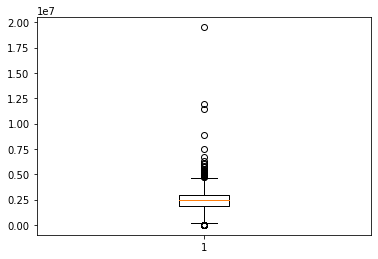

In [61]:
pro_housekk = project_df[(project_df['province_name_th']=='ขอนแก่น') & (project_df['propertytype_name_th']=='บ้าน')]
plt.boxplot(pro_housekk['price_min'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f489b683510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f489b683f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f489b6fbf90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f489b689a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f489b689fd0>],
 'means': []}

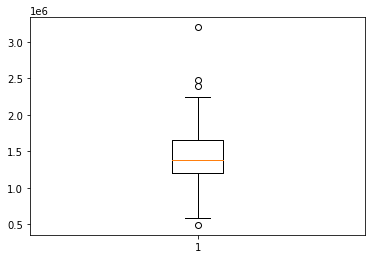

In [62]:
pro_condokk = project_df[(project_df['province_name_th']=='ขอนแก่น') & (project_df['propertytype_name_th']=='คอนโด')]
plt.boxplot(pro_condokk['price_min'].dropna())

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


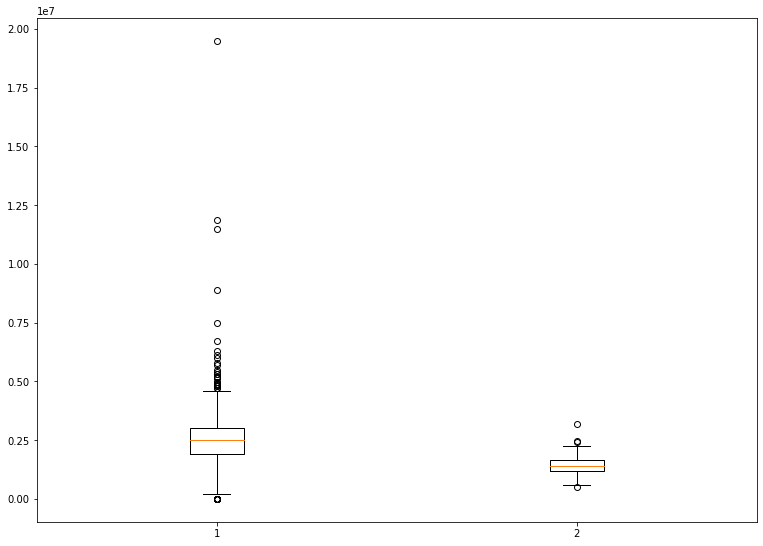

In [63]:
pro_housekk = project_df[(project_df['province_name_th']=='ขอนแก่น') & (project_df['propertytype_name_th']=='บ้าน')]
pro_condokk = project_df[(project_df['province_name_th']=='ขอนแก่น') & (project_df['propertytype_name_th']=='คอนโด')]
datakk = [pro_housekk['price_min'], pro_condokk['price_min']]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(datakk)
plt.show()

***

ข้อ 7 เปรียบเทียบราคาบ้านในภาคเหนือ ใต้ อีสาน

In [64]:
# ภาคเหนือ -- เชียงใหม่ + เชียงราย
project_df[((project_df['province_name_th']=='เชียงใหม่') | (project_df['province_name_th']=='เชียงราย')) & (project_df['propertytype_name_th']=='บ้าน')].describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,1067.000000,1.062000e+03,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1062.000000,1017.000000,848.000000,211.000000,208.000000,52.000000,299.000000,148.000000,259.000000,439.000000
mean,11660.632615,3.225139e+06,18.927835,99.110682,1299.850047,1290.021556,1172.349578,51001.575330,96.150442,2.750000,0.862559,0.860577,0.269231,0.899666,0.756757,0.895753,0.947608
std,6910.419504,3.857072e+06,0.393616,0.276911,428.635170,427.401587,455.502008,2228.585151,119.665314,2.750335,0.345131,0.347223,0.447888,0.300949,0.430498,0.306172,0.223070
min,14.000000,0.000000e+00,18.568075,98.815511,1007.000000,1006.000000,1005.000000,50000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5397.500000,1.590000e+06,18.738550,98.976791,1123.000000,1121.000000,1005.000000,50140.000000,23.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,11676.000000,2.300000e+06,18.792606,99.021308,1184.000000,1175.000000,1005.000000,50210.000000,55.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17603.500000,3.500000e+06,18.866886,99.071820,1213.000000,1206.500000,1005.000000,50230.000000,122.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,23416.000000,4.700000e+07,20.438575,99.910278,2540.000000,2535.000000,2411.000000,57250.000000,1200.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# ภาคใต้ -- นครศรีธรรมราช + ภูเก็ต
project_df[((project_df['province_name_th']=='นครศรีธรรมราช') | (project_df['province_name_th']=='ภูเก็ต')) & (project_df['propertytype_name_th']=='บ้าน')].describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,340.000000,3.370000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,318.000000,275.000000,94.000000,93.000000,22.000000,157.000000,67.000000,131.000000,247.000000
mean,10889.552941,9.084782e+06,8.051874,98.711106,3255.502941,3250.467647,3241.285294,82252.414706,108.566038,2.003636,0.840426,0.870968,0.181818,0.942675,0.776119,0.900763,0.983806
std,6741.491235,2.171993e+07,0.220562,0.669907,1162.988130,1160.129764,1157.311679,2721.189842,153.486650,1.308306,0.368175,0.337053,0.394771,0.233206,0.419989,0.300127,0.126479
min,8.000000,0.000000e+00,7.774631,98.269022,2619.000000,2617.000000,2616.000000,38110.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5186.500000,2.390000e+06,7.904166,98.334866,2623.000000,2617.000000,2616.000000,83000.000000,20.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,10451.000000,3.790000e+06,7.985982,98.363597,2631.000000,2630.000000,2616.000000,83100.000000,58.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,16440.000000,8.000000e+06,8.088012,98.406656,2635.000000,2630.000000,2616.000000,83110.000000,136.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,23375.000000,2.800000e+08,8.671865,100.029651,5496.000000,5479.000000,5377.000000,83150.000000,1298.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
# ภาคอีสาน -- ขอนแก่น + อุดร
project_df[((project_df['province_name_th']=='ขอนแก่น') | (project_df['province_name_th']=='อุดรธานี')) & (project_df['propertytype_name_th']=='บ้าน')].describe()

,row_number,price_min,latitude,longitude,subdistrict_id,district_id,province_id,zipcode,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
count,555.000000,5.490000e+02,555.000000,555.000000,551.000000,555.000000,555.000000,550.000000,417.000000,288.000000,81.000000,89.000000,29.000000,179.000000,91.000000,95.000000,258.000000
mean,12039.401802,2.644977e+06,16.688513,102.778941,2808.656987,2787.675676,2779.767568,40274.930909,67.640288,2.197917,0.765432,0.764045,0.172414,0.893855,0.769231,0.800000,0.899225
std,6789.139298,1.889151e+06,0.428521,0.136738,244.223415,241.593864,243.698033,437.037659,88.626025,1.720666,0.426369,0.427000,0.384426,0.308887,0.423659,0.402122,0.301616
min,26.000000,0.000000e+00,15.730169,102.056206,2639.000000,2638.000000,2637.000000,40000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6026.000000,1.890000e+06,16.425273,102.761656,2648.000000,2638.000000,2637.000000,40000.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,12408.000000,2.490000e+06,16.475191,102.804640,2653.000000,2638.000000,2637.000000,40000.000000,34.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,17938.500000,3.000000e+06,17.318419,102.836909,3199.000000,3196.000000,3195.000000,41000.000000,88.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,23398.000000,2.500000e+07,17.679754,103.235415,3357.000000,3275.000000,3195.000000,41370.000000,600.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


บ้านในภาคใต้มีราคาเฉลี่ยแพงที่สุด & บ้านในภาคอีสานมีราคาเฉลี่ยถูกที่สุด

- ภาคเหนือ: 3.225139 ล้านบาท
- ภาคใต้: 9.084782 ล้านบาท
- ภาคอีสาน: 2.644977 ล้านบาท
***

ข้อ 8 เปรียบเทียบความหลากหลายของโครงการในขอนแก่นกับชลบุรี

In [67]:
project_df[(project_df['province_name_th']=='ขอนแก่น')]['propertytype_name_th']

38       ทาวน์โฮม
72           บ้าน
118         คอนโด
123          บ้าน
162          บ้าน
           ...   
23250        บ้าน
23286        บ้าน
23288        บ้าน
23337        บ้าน
23357        บ้าน
Name: propertytype_name_th, Length: 617, dtype: object

In [68]:
project_df[(project_df['province_name_th']=='ชลบุรี')]['propertytype_name_th']

1               คอนโด
2            ทาวน์โฮม
17               บ้าน
23           ทาวน์โฮม
30              คอนโด
             ...     
23395           คอนโด
23397    อาคารพาณิชย์
23404           คอนโด
23421           คอนโด
23423        ทาวน์โฮม
Name: propertytype_name_th, Length: 2863, dtype: object

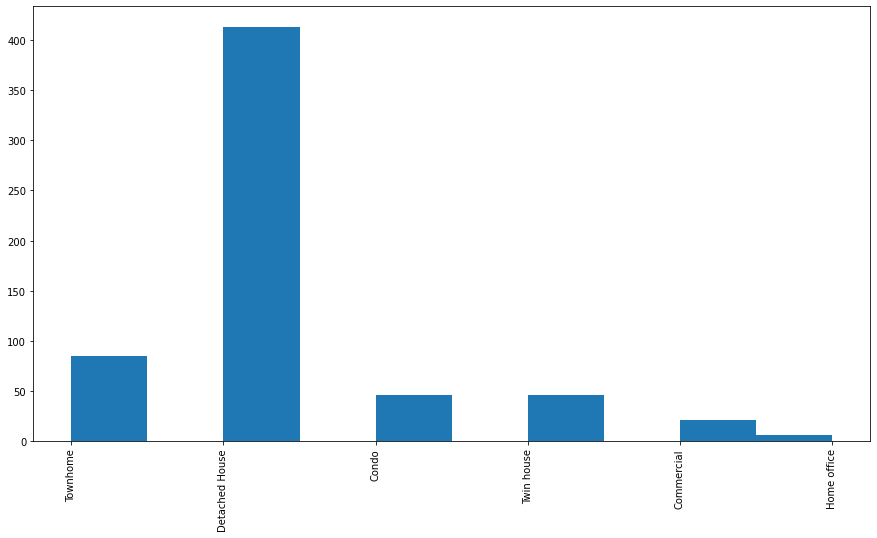

In [69]:
housekk = project_df[(project_df['province_name_th']=='ขอนแก่น')]['propertytype_name_en']
plt.figure(figsize=(15,8))      # จัดการขนาดรูป (x,y)
plt.hist(housekk.dropna())
plt.xticks(rotation='vertical');    # ใส่ ; เพื่อปิดตัวเลข

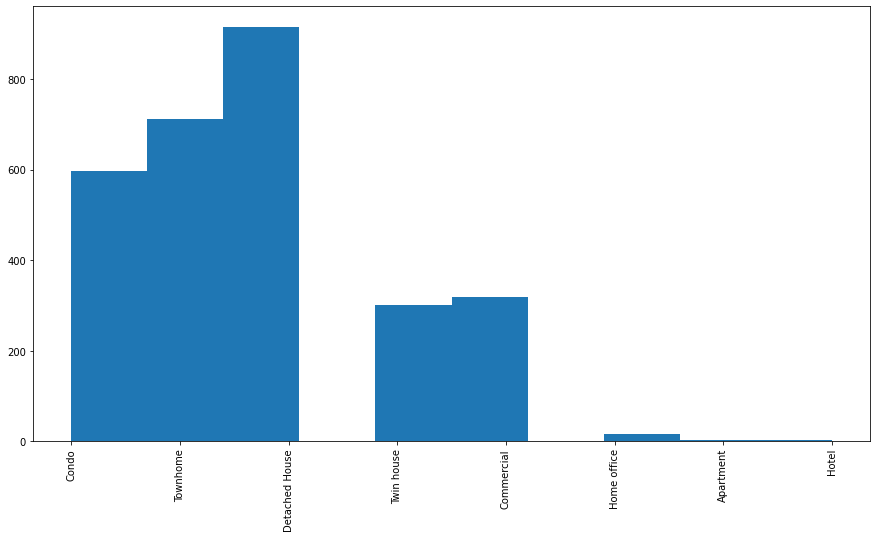

In [70]:
housecb = project_df[(project_df['province_name_th']=='ชลบุรี')]['propertytype_name_en']
plt.figure(figsize=(15,8))      # จัดการขนาดรูป (x,y)
plt.hist(housecb.dropna())
plt.xticks(rotation='vertical');    # ใส่ ; เพื่อปิดตัวเลข

จาก histogram  จะเห็นว่า ในจังหวัดชลบุรีความหลากหลายของโครงการสูงกว่า
***

## Visualization

In [75]:
rent = pd.read_csv('/content/drive/MyDrive/DPDM2022/opendata_volume_listing_rent.csv')
rent.head()

,row_number,transction_year,transction_month,listing_province_name_th,listing_province_name_en,listing_district_name_th,listing_district_name_en,project_propertytype_name_th,project_propertytype_name_en,volume_of_rental,day
0,1324,2020,12,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,702,2022-08-31
1,136,2020,10,กรุงเทพมหานคร,BANGKOK,บางกอกน้อย,BANGKOK NOI,คอนโด,Condo,33,2022-08-31
2,310,2020,5,นนทบุรี,NONTHABURI,ปากเกร็ด,PAK KRET,คอนโด,Condo,22,2022-08-31
3,1570,2020,3,กรุงเทพมหานคร,BANGKOK,บางรัก,BANG RAK,คอนโด,Condo,104,2022-08-31
4,1063,2019,7,กรุงเทพมหานคร,BANGKOK,พระนคร,PHRA NAKHON,คอนโด,Condo,11,2022-08-31


In [87]:
set(rent['listing_district_name_en'])

{'BANG BO',
 'BANG BUA THONG',
 'BANG KAPI',
 'BANG KHAE',
 'BANG KHEN',
 'BANG KHO LAEM',
 'BANG KHUN THIAN',
 'BANG KRUAI',
 'BANG NA',
 'BANG PHLAT',
 'BANG PHLI',
 'BANG RAK',
 'BANG SAO THONG',
 'BANG SUE',
 'BANG YAI',
 'BANGKOK NOI',
 'BANGKOK YAI',
 'BUENG KUM',
 'CHATUCHAK',
 'CHOM THONG',
 'DIN DAENG',
 'DON MUEANG',
 'HUAI KHWANG',
 'KHAN NA YAO',
 'KHLONG LUANG',
 'KHLONG SAN',
 'KHLONG TOEI',
 'LAK SI',
 'LAM LUK KA',
 'LAT KRABANG',
 'LAT PHRAO',
 'MIN BURI',
 'MUEANG NAKHON PATHOM',
 'MUEANG NONTHABURI',
 'MUEANG PATHUM THANI',
 'MUEANG SAMUT PRAKAN',
 'PAK KRET',
 'PATHUM WAN',
 'PHASI CHAROEN',
 'PHATTHANAKAN',
 'PHAYA THAI',
 'PHRA KHANONG',
 'PHRA NAKHON',
 'PHRA PRADAENG',
 'PHUTTHAMONTHON',
 'PRAWET',
 'RAT BURANA',
 'RATCHATHEWI',
 'SAI MAI',
 'SAM PHRAN',
 'SATHON',
 'SUAN LUANG',
 'THANYABURI',
 'THAWI WATTHANA',
 'THON BURI',
 'THUNG KHRU',
 'VADHANA',
 'WANG THONGLANG',
 'YAN NAWA'}

### plt.plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [78]:
# เลือก rent ในย่าน จัตุจักร และเรียงปี/เดือน จากน้อยไปมาก (default ascending=T)(ถ้าต้องการเเรียงมากไปน้อย ต้องปรับเป็น F)
rent[rent['listing_district_name_en']=='CHATUCHAK'].sort_values(by=['transction_year', 'transction_month'])

,row_number,transction_year,transction_month,listing_province_name_th,listing_province_name_en,listing_district_name_th,listing_district_name_en,project_propertytype_name_th,project_propertytype_name_en,volume_of_rental,day
473,600,2019,1,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,122,2022-08-31
411,1389,2019,2,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,173,2022-08-31
1741,168,2019,3,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,140,2022-08-31
1234,91,2019,4,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,168,2022-08-31
1579,1525,2019,5,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,147,2022-08-31
645,1255,2019,6,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,191,2022-08-31
1291,1001,2019,7,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,268,2022-08-31
1454,945,2019,8,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,238,2022-08-31
1004,1589,2019,9,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,298,2022-08-31
1652,1004,2019,10,กรุงเทพมหานคร,BANGKOK,จตุจักร,CHATUCHAK,คอนโด,Condo,791,2022-08-31


In [80]:
# เลือก data จาก volume_of_rental
data = rent[rent['listing_district_name_en']=='CHATUCHAK'].sort_values(by=['transction_year', 'transction_month'])['volume_of_rental']
data

473      122
411      173
1741     140
1234     168
1579     147
645      191
1291     268
1454     238
1004     298
1652     791
899     1250
1498     162
654      163
267      147
1495     179
562      207
719      193
1162     175
1731     218
1716     522
1682     270
385      329
919      259
0        702
239      530
1598     495
1232     399
1135     413
14       554
815      631
308      550
767      563
23       611
332      478
1408     620
608      469
701      382
Name: volume_of_rental, dtype: int64

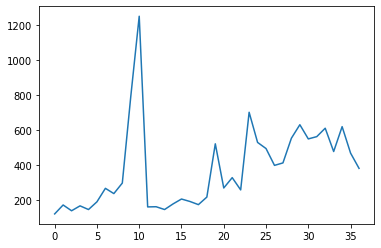

In [81]:
plt.plot(range(len(data)),data)
# range(len(data)) = สร้างแกน x เป็นเลขตั้งแต่ 0 ถึง ความยาวของ data

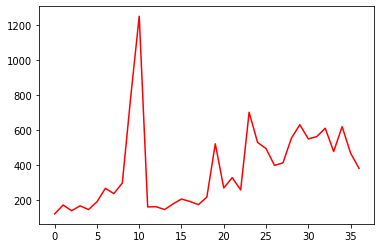

In [82]:
#การปรับแต่งกราฟ - เปลี่ยนสีของจุด data - rgb cmyk
plt.plot(range(len(data)),data,'r')

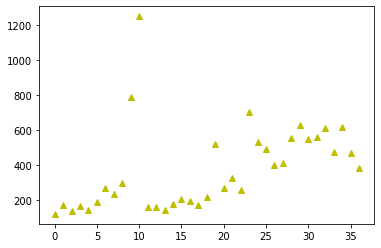

In [107]:
#การปรับแต่งกราฟ - เปลี่ยนรูปแบบของจุด data (^=สามเหลี่ยม, 8=แปดเหลี่ยม)
plt.plot(range(len(data)),data,'^y')

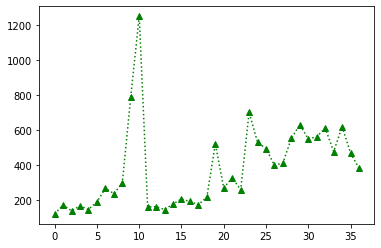

In [86]:
#การปรับแต่งกราฟ - เปลี่ยนรูปแบบของเส้นเชื่อม data (- เส้นทึบ, : เส้นประ)
plt.plot(range(len(data)),data,'^:g')

In [90]:
#สร้าง data ใหม่จาก SATHON เพื่อใช้ plot เปรียบเทียบกับ data เดิมจาก CHATUCHAK
rent[rent['listing_district_name_en']=='SATHON'].sort_values(by=['transction_year', 'transction_month'])

,row_number,transction_year,transction_month,listing_province_name_th,listing_province_name_en,listing_district_name_th,listing_district_name_en,project_propertytype_name_th,project_propertytype_name_en,volume_of_rental,day
1521,308,2019,1,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,57,2022-08-31
312,925,2019,2,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,60,2022-08-31
1158,806,2019,3,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,57,2022-08-31
1435,138,2019,4,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,85,2022-08-31
281,197,2019,5,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,87,2022-08-31
1778,1024,2019,6,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,95,2022-08-31
1253,621,2019,7,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,124,2022-08-31
1399,1365,2019,8,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,113,2022-08-31
472,435,2019,9,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,130,2022-08-31
1419,1610,2019,10,กรุงเทพมหานคร,BANGKOK,สาทร,SATHON,คอนโด,Condo,451,2022-08-31


In [95]:
data2 = rent[rent['listing_district_name_en']=='SATHON'].sort_values(by=['transction_year', 'transction_month'])['volume_of_rental']

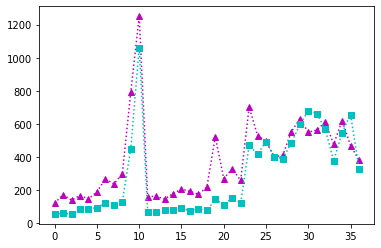

In [96]:
# พล็อตหลายกราฟในรูปเดียวกันได้ ข้อควรระวังคือควรใช้สเกลเดียวกัน
plt.plot(range(len(data)),data,'^:m')
plt.plot(range(len(data2)),data2,'s:c')

### Scatter plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [97]:
project_df.columns

Index(['row_number', 'project_id', 'name_en', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'price_min',
       'developer_id', 'developer_name_en', 'developer_name_th', 'latitude',
       'longitude', 'neighborhood_id', 'neighborhood_name_en',
       'neighborhood_name_th', 'subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th', 'district_id', 'district_name_en',
       'district_name_th', 'province_id', 'province_name_en',
       'province_name_th', 'zipcode', 'count_elevator',
       'count_elevator_service', 'count_floor', 'count_parking', 'count_tower',
       'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground', 'facility_pool', 'facility_security',
       'date_created', 'date_finish', 'date_updated', 'source', 'url_project'],
      dtype='object')

In [104]:
datacondo = project_df[(project_df['propertytype_name_en']=='Condo') & (project_df['province_name_en']=='Bangkok')][['latitude', 'longitude', 'count_unit']]

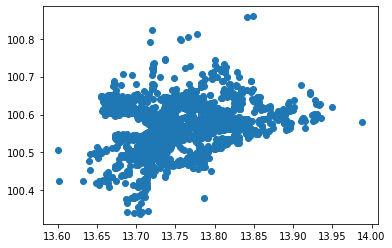

In [106]:
plt.scatter(datacondo['latitude'], datacondo['longitude'])

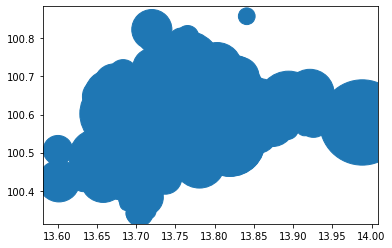

In [108]:
plt.scatter(datacondo['latitude'], datacondo['longitude'], s=datacondo['count_unit'])
# สามารถใส่ขนาดจุดให้เล็กใหญ่ตามค่าที่ต้องการได้ (ในที่นี้คือ count_unit)

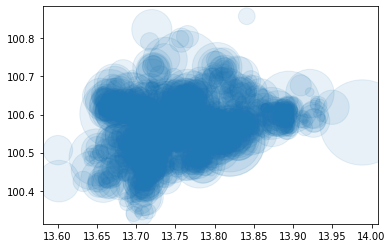

In [109]:
plt.scatter(datacondo['latitude'], datacondo['longitude'], s=datacondo['count_unit'], alpha=0.1)
# alpha =  ความโปร่งใสของรูป (dafault=1)
# ตรงกลางทับซ้อนกันมาก สีเลยทึบขึ้น

## Groupby (จัดกลุ่มข้อมูล)

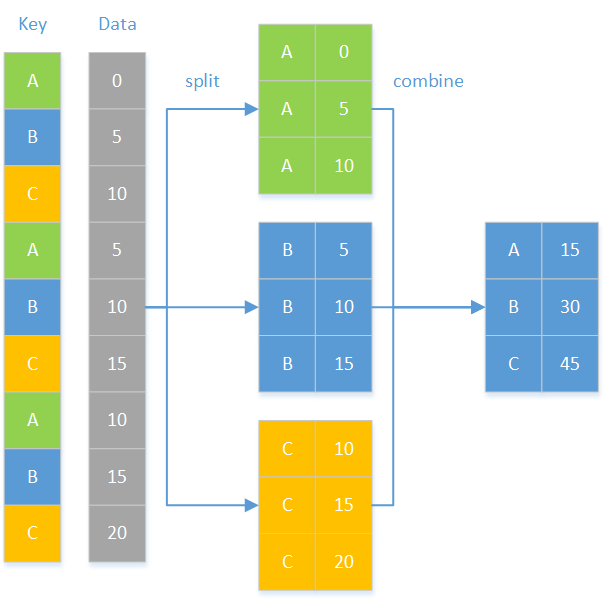

In [71]:
unit_df = pd.read_csv('/content/drive/MyDrive/DPDM2022/Copy of opendata_unittype.csv')

In [72]:
unit_df.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype'],
      dtype='object')

In [73]:
# ราคาเฉลี่ยของบ้านในแต่ละกลุ่ม

unit_df.groupby(['propertytype_name_en']).mean()['price_min']

propertytype_name_en
Apartment              1.888571e+06
Commercial             4.440612e+06
Condo                  6.266300e+06
Detached House         6.674175e+06
Home office            1.047904e+07
Hotel                  1.081375e+07
Land                   5.687840e+06
Office Space           1.583333e+07
Townhome               2.810930e+06
Twin house             3.612469e+06
Warehouse / Factory    1.840900e+07
Name: price_min, dtype: float64